In [1]:
import ephys_util
from ephys_util import *

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
from scipy import signal
from scipy.io import wavfile

# Get wm data

In [4]:
wm_sr, wm_raw = 12500, np.load('data_small.npy').T
wm_raw = np.multiply(wm_raw, 6250.0/float(np.iinfo(np.int16).max), dtype=np.float32)

In [5]:
print(wm_raw.dtype, wm_raw.shape)
print(np.iinfo(np.int16).max)
print(np.max(wm_raw))

float32 (64, 7500000)
32767
6248.856


# Method 1: presently used method- bandpass all at once, axis=1


In [6]:
wm_method_1_filt = butter_bandpass_filter(wm_raw, 200, 2000, wm_sr)
print(wm_method_1_filt.shape)

13:39:51- Function butter_bandpass, called by butter_bandpass_filter, executed in 0.002s
13:39:59- Function butter_bandpass_filter, called by <module>, executed in 7.596s
(64, 7500000)


# Method 2: bandpass each channel individually

In [7]:
wm_method_2_filt = list()
sos = butter_bandpass(200, 2000, 12500)
for chan in range(wm_raw.shape[0]):
    wm_method_2_filt.append(signal.sosfilt(sos, wm_raw[chan, :]))
wm_method_2_filt = np.stack(wm_method_2_filt, axis=0)
print(wm_method_2_filt.shape)

13:39:59- Function butter_bandpass, called by <module>, executed in 0.002s
(64, 7500000)


# Method 3: bandpass all at once, axis=0

In [8]:
wm_method_3_filt = signal.sosfilt(sos, wm_raw, axis=0)
print(wm_method_3_filt.shape)

(64, 7500000)


# Quick mean subtraction

In [9]:
wm_method_1_filt -= np.mean(wm_method_1_filt, axis=0).reshape((1, -1))
wm_method_2_filt -= np.mean(wm_method_2_filt, axis=0).reshape((1, -1))
wm_method_3_filt -= np.mean(wm_method_3_filt, axis=0).reshape((1, -1))

# Visualization

In [15]:
channel, start, duration = 10, 257, 0.25
section = int(start), int(start + duration * wm_sr)

raw_section = wm_raw[channel, section[0]:section[1]]
method_1_section = wm_method_1_filt[channel, section[0]:section[1]]
method_2_section = wm_method_2_filt[channel, section[0]:section[1]]
method_3_section = wm_method_3_filt[channel, section[0]:section[1]]


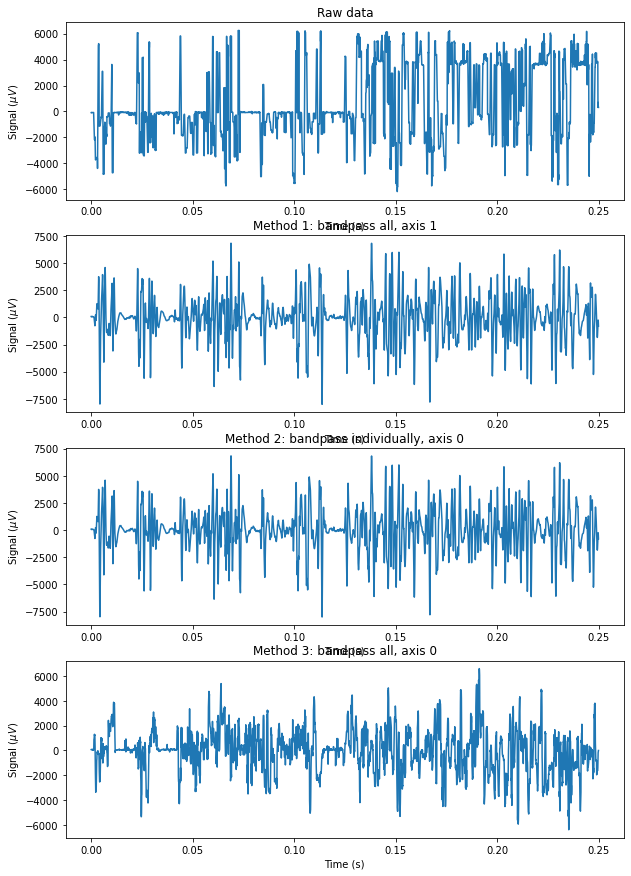

In [16]:
plt.figure(figsize=(10, 15))
plt.title('Three methods of bandpassing data. Channel: {}, Location: {}'.format(channel, start))
time_axis = np.arange(len(method_1_section)) / wm_sr


plt.subplot(4, 1, 1)
plt.title('Raw data')
plt.xlabel('Time (s)')
plt.ylabel('Signal $(\mu{}V)$')
plt.plot(time_axis, raw_section)

plt.subplot(4, 1, 2)
plt.title('Method 1: bandpass all, axis 1')
plt.xlabel('Time (s)')
plt.ylabel('Signal $(\mu{}V)$')
plt.plot(time_axis, method_1_section)

plt.subplot(4, 1, 3)
plt.title('Method 2: bandpass individually, axis 0')
plt.xlabel('Time (s)')
plt.ylabel('Signal $(\mu{}V)$')
plt.plot(time_axis, method_2_section)

plt.subplot(4, 1, 4)
plt.title('Method 3: bandpass all, axis 0')
plt.xlabel('Time (s)')
plt.ylabel('Signal $(\mu{}V)$')
plt.plot(time_axis, method_3_section)
plt.show()